# Predicting per capita income of Canada

 ### Linear regression with a singal variable 
Source of data - [per capita income](https://data.worldbank.org/indicator/NY.ADJ.NNTY.PC.CD)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
# load data from csv
df = pd.read_csv('canada_per_capita_income.csv')

In [12]:
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


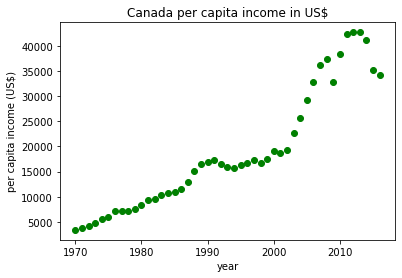

In [13]:
#scatter plot
plt.title('Canada per capita income in US$')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'],color = 'green', marker = 'o')

In [14]:
year_df = df.drop('per capita income (US$)', axis = 'columns')
year_df.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [15]:
income = df['per capita income (US$)']
income.head(5)

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [16]:
#create linear regression object
reg = linear_model.LinearRegression()
reg.fit(year_df, income)

LinearRegression()

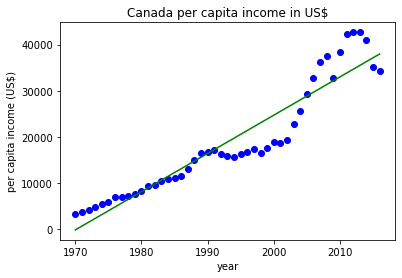

In [17]:
#plot linear_reg line
plt.title('Canada per capita income in US$')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'],color = 'blue', marker = 'o')
plt.plot(df['year'], reg.coef_ * df['year'] +reg.intercept_ , color = 'green')

### predicting per capita income in 2025

In [18]:
#predicting per capita income 
reg.predict([[2025]])

array([45431.01947053])

**45431.01947053 US$**

In [19]:
#income for upcoming years
data = {
  "year": [2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
}
df_upcoming_years = pd.DataFrame(data)
df_upcoming_years.head(5)

,year
0,2020
1,2021
2,2022
3,2023
4,2024


In [20]:
p = reg.predict(df_upcoming_years)
p

array([41288.69409442, 42117.15916964, 42945.62424486, 43774.08932009,
       44602.55439531, 45431.01947053, 46259.48454575, 47087.94962098,
       47916.4146962 , 48744.87977142, 49573.34484664])

In [21]:
df_upcoming_years['income US$'] = p
df_upcoming_years.head(4)

,year,income US$
0,2020,41288.694094
1,2021,42117.159170
2,2022,42945.624245
3,2023,43774.089320


In [22]:
#save as csv
df_upcoming_years.to_csv('future_per_capita_income.csv')

### save the model to a file

***using pickle***

In [23]:
import pickle

In [24]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [25]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [27]:
mp.predict([[2025]])

array([45431.01947053])

***using joblib***

In [30]:
from joblib import dump, load

In [32]:
dump(reg, 'model_joblib.joblib')

['model_joblib.joblib']

In [35]:
reg = load('model_joblib.joblib')

In [36]:
reg.predict([[2025]])

array([45431.01947053])